In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from operator import itemgetter
from statistics import mode

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris,load_breast_cancer

In [4]:
class KNN:
    
    """  Function to initialize the parameters required for the model. """    
    def __init__(self,k=3):
        self.k=k 
        
        
    """  Function to calculate the Euclidean distance between points in N-dimensional space.   """
    def get_distance(self,pt1,pt2):
        res=0
        for i in range(pt1.shape[0]):
            res+=(pt1[i]-pt2[i])**2
        return np.sqrt(res)
    
    
    """  Function to find the most suitable class/label for the given test item(record) """
    def getlabel(self,xt):        
        distances = [(idx,self.get_distance(train[0],xt),train[1]) for idx,train in enumerate(self.traindata)]
        distances.sort(key=itemgetter(1))
        return mode(list(map(lambda x: x[2],distances[:self.k]))) 

    """  Function for model fitting."""
    def fit(self,X,Y):
        self.traindata = list(zip(X,Y))
    
    """  Function for predictions"""
    def predict(self,X):
        return np.array([self.getlabel(x) for x in X])
    
    """  Function : Generates Classification Report   """
    def classification_report(self,X,y):
        p = self.predict(X) 
        
        cm_df = pd.crosstab(p,y,rownames=['Predicted'],colnames=['Actual'])
        print('\nConfusion Matrix:\n',cm_df)
        
        TN = cm_df.loc[0,0] # Predicted = 0 and  Actual = 0
        TP = cm_df.loc[1,1] # Predicted = 1 and  Actual = 1
        FN = cm_df.loc[0,1] # Predicted  = 0 But Actual = 1
        FP = cm_df.loc[1,0] # Predicted  = 1 But Actual = 0

        acc = (TP+TN)/(TP+TN+FP+FN)
        tpr = recall = TP/(TP+FN) # Recall / Sensitivity / True Positive Rate
        tnr = TN/(TN+FP) # Specificity / True Negative Rate
        precision = TP/(TP+FP) # Precision
        f1_score = 2*precision*recall/(precision+recall) # F1-Score

        return pd.DataFrame({
        'Accuracy':acc.round(3)*100,
        'True Positive Rate':recall.round(3)*100,
        'True Negative Rate':tnr.round(3)*100,
        'Precision':precision.round(3)*100,
        'F1_Score':f1_score.round(3)*100},index=['Perc']).T
           
    

### Example 1 

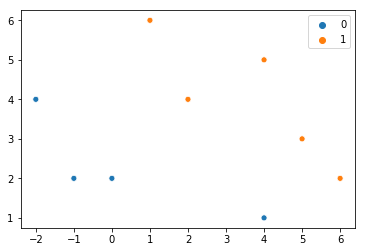

In [5]:
X = np.array(
    [
    [-1,2],[0,2],[-2,4],[4,1],
    [1, 6],[4,5],[5,3],[2, 4],[6, 2]
    ])

Y = np.array([0,0,0,0,1,1,1,1,1])
sns.scatterplot(X[:,0],X[:,1],hue=Y)

In [6]:
model  = KNN(k=3)
model.fit(X,Y)
model.classification_report(X,Y)


Confusion Matrix:
 Actual     0  1
Predicted      
0          3  0
1          1  5


,Perc
Accuracy,88.9
True Positive Rate,100.0
True Negative Rate,75.0
Precision,83.3
F1_Score,90.9


In [7]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)
pp = knn.predict(X)
print('Sklearn - KNN Accuracy: ',round((pp==Y).mean(),3)*100,'%') 

Sklearn - KNN Accuracy:  88.9 %


### Example 2

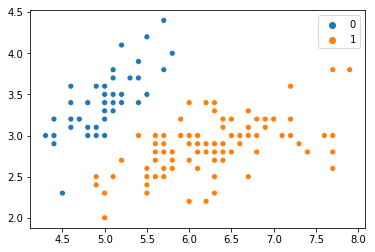

In [8]:
iris = load_iris()
X = iris.data[:,:2]
Y = (iris.target!=0)*1
sns.scatterplot(X[:,0],X[:,1],hue=Y)

In [9]:
model  = KNN(k=3)
model.fit(X,Y)
model.classification_report(X,Y)


Confusion Matrix:
 Actual      0    1
Predicted         
0          49    0
1           1  100


,Perc
Accuracy,99.3
True Positive Rate,100.0
True Negative Rate,98.0
Precision,99.0
F1_Score,99.5


In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)
pp = knn.predict(X)
print('Sklearn - KNN Accuracy: ',round((pp==Y).mean(),3)*100,'%') 

Sklearn - KNN Accuracy:  99.3 %


### Example 3   :

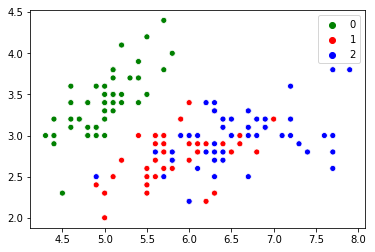

In [11]:
iris = load_iris()
X = iris.data
Y = iris.target
sns.scatterplot(X[:,0],X[:,1],hue=Y,palette=['green','red','blue'])

In [12]:
model  = KNN(k=3)
model.fit(X,Y)
# model.classification_report(X,Y)
P = model.predict(X)
print('Accuracy:',round((P==Y).mean(),3)*100,'%')

Accuracy: 96.0 %


In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)
pp = knn.predict(X)
print('Sklearn - KNN Accuracy: ',round((pp==Y).mean(),3)*100,'%') 

Sklearn - KNN Accuracy:  96.0 %


### Example 4

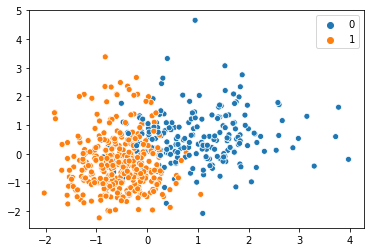

In [14]:
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
Y = data.target

sns.scatterplot(X[:,0],X[:,1],hue=Y)

In [15]:
model  = KNN(k=3)
model.fit(X,Y)
model.classification_report(X,Y)


Confusion Matrix:
 Actual       0    1
Predicted          
0          202    1
1           10  356


,Perc
Accuracy,98.1
True Positive Rate,99.7
True Negative Rate,95.3
Precision,97.3
F1_Score,98.5


In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)
pp = knn.predict(X)
print('Sklearn - KNN Accuracy: ',round((pp==Y).mean(),3)*100,'%') 

Sklearn - KNN Accuracy:  98.1 %


##### EX4 - USING TRAIN - TEST SPLIT

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

model  = KNN(k=5)
model.fit(X_train,Y_train)
model.classification_report(X_test,Y_test)


Confusion Matrix:
 Actual      0   1
Predicted        
0          50   1
1           4  88


,Perc
Accuracy,96.5
True Positive Rate,98.9
True Negative Rate,92.6
Precision,95.7
F1_Score,97.2


In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
pp = knn.predict(X_test)
print('Sklearn - KNN Accuracy: ',round((pp==Y_test).mean(),3)*100,'%') 

Sklearn - KNN Accuracy:  96.5 %


## NOTES:

1. To find nearest points(neighbours) i have used euclidean distance method. Various other methods are possible such as Manhattan(City Block), Mahalanobis, Cosine, Minkowski distance methods.<br>
2. This is a simple k-Nearest Neighbours method, where all the distances are given equal priority(weights). There is another possibility in kNN , i.e., Weighted kNN. ( Shall implement it later).<br>
3. I have implemented only classification model. We can implement for regression problems too. Only difference is instead of majority voting we have to use Mean/Median methods for k-nearest neighbours.